In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("C:\\Users\\VARKEY JOSHY T\\Desktop\\train.csv")

# Explore data
print(data.describe())
print(data.info())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [8]:
print(data[['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   BsmtFullBath  1460 non-null   int64
 2   BsmtHalfBath  1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB
None


In [9]:
# Handle missing values
data = data.dropna(subset=['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr'])

# Ensure all columns are numeric
for col in ['LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove any remaining non-numeric columns
data = data.select_dtypes(include=[np.number])

Mean Squared Error: 4432204149.309484
R-squared Score: 0.4380596196427211
Cross-validation scores: [0.50003245 0.05989463 0.46916951 0.51924051 0.36422231]
Average CV score: 0.38251188006574294


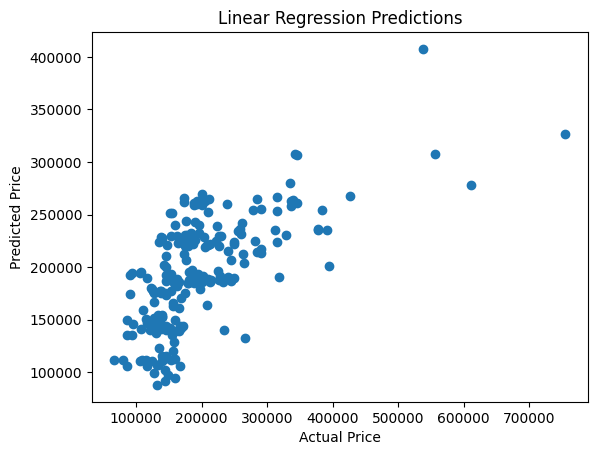

        feature   coefficient
0       LotArea  12870.696253
1  BsmtFullBath  20969.691617
2  BsmtHalfBath   2468.866063
3      FullBath  46138.963630
4      HalfBath  17681.139728
5  BedroomAbvGr  -7238.411003


In [13]:
# Prepare data
# Handle missing values (assuming we'll drop rows with any missing values)
#data = data.dropna()

# Encode categorical variables if any
# For this example, let's assume all features are numerical

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']])

# Split data
X = X_scaled
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

# Visualize predictions vs actuals
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression Predictions")
plt.show()

# Feature importance
coefficients = pd.DataFrame({'feature': ['LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr'], 
                            'coefficient': model.coef_})
print(coefficients)